

# Project: No show appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **About the dataset**: The dataset has more that 10k records of patients scheduled their appointments and whether they showed up to the appointment or they did not.


> **Inroduction**: In this project I will discuss and investigate what are some of the common reason let patients miss their appointments.  


<a id='wrangling'></a>
## Data Wrangling

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# downloading data 

df = pd.read_csv('data/noshow.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [31]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [32]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [3]:
df.duplicated().sum()

0

### Data Cleaning 

**Discribe() and info() provide some important information and things need to be changed in the dataset** 
- Some columns needs to be droped 
- some columns has some name mistakes need to be changed. 
- Changing the data type for multiple columns. 
- There is a Min age of -1 and I need to drop it. 

In [4]:
# Changing all the needed datatypes to appropriate data type

df['PatientId'] = df['PatientId'].astype('int')
df['Gender'] = df['Gender'].astype('category')
df['Scholarship'] = df['Scholarship'].astype('category')
df['Hipertension'] = df['Hipertension'].astype('category')
df['Diabetes'] = df['Diabetes'].astype('category')
df['Alcoholism'] = df['Alcoholism'].astype('category')
df['Handcap'] = df['Handcap'].astype('category')
df['SMS_received'] = df['SMS_received'].astype('category')
df['No-show'] = df['No-show'].astype('category')

# converting ScheduledDay and AppointmentDay to  appropriate data type

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int32         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  category      
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  category      
 8   Hipertension    110527 non-null  category      
 9   Diabetes        110527 non-null  category      
 10  Alcoholism      110527 non-null  category      
 11  Handcap         110527 non-null  category      
 12  SMS_received    110527 non-null  category      
 13  No-show         110527 non-null  category      
dtypes: category(8), datetime64[ns](2), i

In [5]:
df.describe()

# age has min value of -1, any value below 0 should be droped. 

,PatientId,AppointmentID,Age
count,1.105270e+05,1.105270e+05,110527.000000
mean,-2.140311e+09,5.675305e+06,37.088874
std,1.508486e+08,7.129575e+04,23.110205
min,-2.147484e+09,5.030230e+06,-1.000000
25%,-2.147484e+09,5.640286e+06,18.000000
50%,-2.147484e+09,5.680573e+06,37.000000
75%,-2.147484e+09,5.725524e+06,55.000000
max,2.141274e+09,5.790484e+06,115.000000


In [6]:

# droping the any age under 0.
drop_age= df[df['Age'] < 0].index
drop_age

Int64Index([99832], dtype='int64')

In [7]:
df.drop(drop_age, axis=0 , inplace = True)

In [8]:
# making sure the age dropped. 
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [9]:
# some of the columns has spilling mistakes, and some columns has long column name.
df.rename(columns={'ScheduledDay': 'Scheduled_date' , 'AppointmentDay': 'Appointment_date',
                  'Hipertension':'Hypertension' , 'Handcap':'Handicap',
                  'No-show':'No_show'}, inplace=True)

# Making sure the columns name changed. 
df.head(1)

,PatientId,AppointmentID,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
# Droping the PatientId and AppointmentID
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# making sure columns are droped.
df.head(1)

,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [41]:
df.shape

(110526, 12)

In [11]:
# see the sum of duplicate values. 
df.duplicated().sum()

8070

In [12]:
# taking a look to the duplicate values before droping them
df.loc[df.duplicated(),:]

,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
52,F,2016-03-31,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
99,F,2016-04-29,2016-04-29,1,BONFIM,0,0,0,0,0,0,No
110,F,2016-04-12,2016-04-29,34,SANTO ANTÔNIO,0,0,0,0,0,1,No
154,F,2016-04-28,2016-04-29,30,ITARARÉ,0,0,0,0,0,0,No
210,F,2016-04-26,2016-04-29,47,SANTOS DUMONT,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110505,F,2016-06-01,2016-06-01,55,MARIA ORTIZ,0,0,0,0,0,0,No
110507,F,2016-06-08,2016-06-08,0,MARIA ORTIZ,0,0,0,0,0,0,No
110510,F,2016-06-01,2016-06-01,64,SOLON BORGES,0,0,0,0,0,0,No
110513,M,2016-06-08,2016-06-08,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No


In [13]:
# droping the duplicates.
df.drop_duplicates(inplace=True)

# making sure the duplicate values droped. 

df.duplicated().sum()

0

In [14]:
df.shape

(102456, 12)

###  creating an age range groups

In [37]:
# Bin edges that will be used to "cut" the data into groups
df.loc[:, 'Age_range'] = pd.cut(df['Age'], bins=[0,13,40,90], labels=['Childs', 'Adults','Seniors'])
df.groupby('Age_range').mean().loc[:,'No_show']
# Adults are the higher in no-show rates.

Age_range
Childs     0.224296
Adults     0.246031
Seniors    0.177887
Name: No_show, dtype: float64

In [38]:
df.groupby('Age_range').count()

,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_time
Age_range,,,,,,,,,,,,,
Childs,16826,16826,16826,16826,16826,16826,16826,16826,16826,16826,16826,16826,16826
Adults,35715,35715,35715,35715,35715,35715,35715,35715,35715,35715,35715,35715,35715
Seniors,46642,46642,46642,46642,46642,46642,46642,46642,46642,46642,46642,46642,46642


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102451 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Gender            102451 non-null  category      
 1   Scheduled_date    102451 non-null  datetime64[ns]
 2   Appointment_date  102451 non-null  datetime64[ns]
 3   Age               102451 non-null  int64         
 4   Neighbourhood     102451 non-null  object        
 5   Scholarship       102451 non-null  category      
 6   Hypertension      102451 non-null  category      
 7   Diabetes          102451 non-null  category      
 8   Alcoholism        102451 non-null  category      
 9   Handicap          102451 non-null  category      
 10  SMS_received      102451 non-null  category      
 11  No_show           102451 non-null  int64         
 12  Age_range         99183 non-null   category      
 13  Waiting_time      102451 non-null  int64         
dtypes: c

#### Making a variable for the waiting time

In [40]:
df['Waiting_time'] = df['Appointment_date'] - df['Scheduled_date']

In [41]:
df.Waiting_time.describe()

# Min showed there is days with a negative waiting time, and I need to drop them. 

count                     102451
mean     10 days 15:11:16.456061
std      15 days 10:01:27.567996
min              0 days 00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: Waiting_time, dtype: object

In [42]:
# I run into an error where I can't compare between datetime data type and int. this function helps me convert it to days. 
df['Waiting_time'] = df['Waiting_time'].apply(lambda x: x.days)

In [43]:
# droping all the waiting times with a negative value. 

df.drop(df[df.Waiting_time < 0].index, inplace=True)

In [44]:
df.Waiting_time.describe()

count    102451.000000
mean         10.632829
std          15.417680
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_time, dtype: float64

In [45]:
df.shape

(102451, 14)

In [46]:
df.sample(3)

,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_range,Waiting_time
33725,F,2016-05-20,2016-05-25,75,JARDIM CAMBURI,0,1,0,0,0,1,0,Seniors,5
4904,F,2016-05-24,2016-05-30,23,JESUS DE NAZARETH,0,0,0,0,0,1,0,Adults,6
88081,F,2016-06-06,2016-06-06,37,ITARARÉ,0,0,0,0,0,0,0,Adults,0


####  Saving my cleaned data set.

In [47]:
df.to_csv('cleaned_noshow.csv' , index=False)

<a id='eda'></a>
## Exploratory Data Analysis

#### I will discuss what factors are important for us to know,  in order to predict if a patient will show up for their scheduled appointment

- We will see multiple relationships such as gender , sickness , or received sms-massages play a major factor on predicting whether patient showed up or did not. 

- We will see if the age range is a factor on predicting the patient will show up or not. 


Text(0.5, 1.0, 'Number of patiants by thier age')

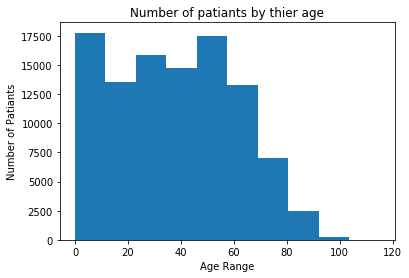

In [66]:
# first I need to look to age distribution of the dataset.
plt.hist(df.Age)
plt.xlabel('Age Range')
plt.ylabel('Number of Patiants')
plt.title('Number of patiants by thier age')
# the Age distribution is skwed to the right and the highest group of the patiants are children

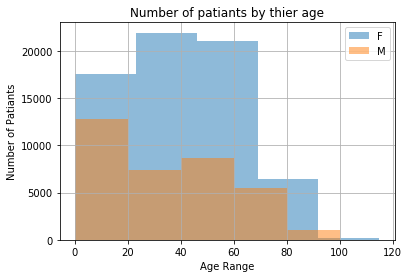

In [67]:
f= df[df.Gender == 'F']
m= df[df.Gender == 'M']
f.Age.hist(label='F', alpha=0.5, bins=5)
m.Age.hist(label='M', alpha=0.5, bins=5)
plt.xlabel('Age Range')
plt.ylabel('Number of Patiants')
plt.title('Number of patiants by thier age')
plt.legend();

# from the histogram we can tell the number of Female patiants are greater than Male


In [50]:
# I will look at Gender distribution and see which gender will more likely to not show to thier appointments.
df.Gender.unique()

[F, M]
Categories (2, object): [F, M]

In [31]:
no_show = df.groupby('Gender').sum()['No_show']

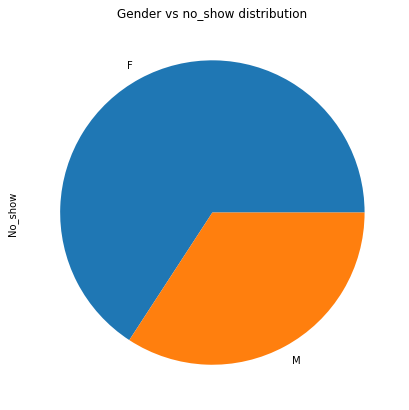

In [52]:
# ploting gender distibution by No_show
no_show.plot.pie(figsize=(7,7),title = 'Gender vs no_show distribution')

- It's clear in the above plot that female are more likely to miss thier appointment.

#### Which group age more likely to miss thier appointment.

In [57]:
df.groupby('Age_range').mean().loc[:, 'No_show']

# This is the ration for all the ranges

Age_range
Childs     0.224296
Adults     0.246031
Seniors    0.177887
Name: No_show, dtype: float64

In [53]:
n_show = df.No_show == 1
y_show = df.No_show == 0

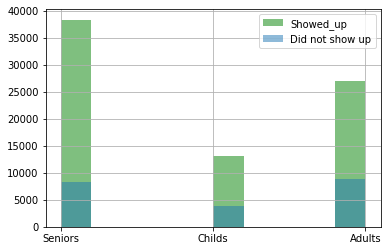

In [54]:
df.Age_range[y_show].hist(alpha=0.5,color='Green', label='Showed_up')
df.Age_range[n_show].hist(alpha=0.5, label='Did not show up')
plt.legend()

# it's clear that senior people visit the hospoital more than any other group and they usually show up for thier appointments

#### which catagaory makes patints don't show up the most? 


In [58]:
# before I visulize it's good to provide the ratio of the catagories. 


df.groupby('Scholarship').mean().loc[:, 'No_show']

# 20% of patients who has a Scholarship showed up for thier appointment
# 24% did not.

Scholarship
0    0.206459
1    0.240364
Name: No_show, dtype: float64

In [59]:
df.groupby('Diabetes').mean().loc[:, 'No_show']

# 21% of patients who has a Diabetes showed up for thier appointment
# 18% did not.

Diabetes
0    0.212091
1    0.182621
Name: No_show, dtype: float64

In [60]:
df.groupby('Hypertension').mean().loc[:, 'No_show']
# 22% of patients who has a Hypertension showed up for thier appointment
# 17% did not.

Hypertension
0    0.218876
1    0.174955
Name: No_show, dtype: float64

In [61]:
df.groupby('SMS_received').mean().loc[:, 'No_show']
# 17% of patients who has a Alcoholism showed up for thier appointment
# 27% did not.

SMS_received
0    0.174815
1    0.277520
Name: No_show, dtype: float64

In [62]:
catagories = df.groupby('No_show')['Scholarship','Hypertension', 'Diabetes' ,
                                   'Alcoholism' , 'Handicap' , 'SMS_received'].sum()

catagories

C:\Users\abdul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
No_show,,,,,,
0,7844,17321,6293,2316,1911,25268
1,2482,3673,1406,656,414,9706


In [63]:
# first I need to count all the patints who didn't show up
noshow_count = catagories.query("No_show == 1")
noshow_count.sum()

Scholarship     2482
Hypertension    3673
Diabetes        1406
Alcoholism       656
Handicap         414
SMS_received    9706
dtype: int64

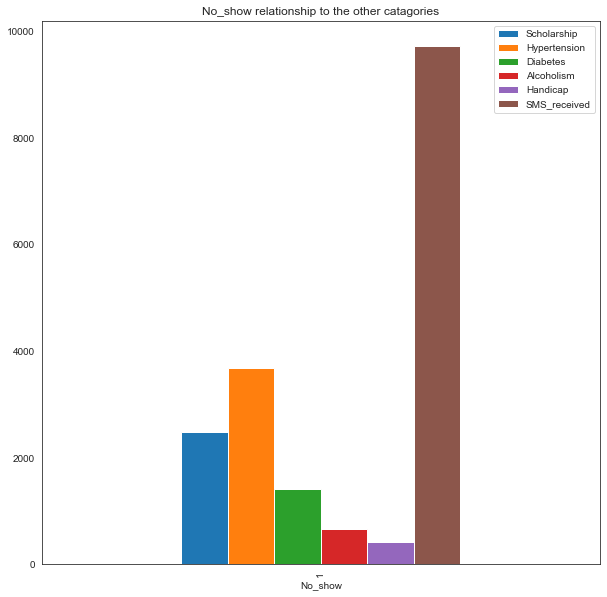

In [42]:
sns.set_style('white')
noshow_count.plot(kind='bar',figsize=(10,10),
                  title='No_show relationship to the other catagories')

<a id='conclusions'></a>
## Conclusions

> **Exploration**:
- Patiants usually missed thier appointments becuase they did not recive SMS.
- Senior people usually don't miss thier appointments. 
- Females are more likely to miss thier appointments more than men. 


> **Limitations**:
- Few variables related to showing up for appointments, there are many other factor could be considered. 
